In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#### Aditional points on K-Means

The standard k-means algorithm is not directly applicable to categorical data.
We could use techniques like one-got encoding to transform categorical variables
into numerical format; but this is not a silver bullet.

It seems like there are algorithms like K-Prototypes and K-modes that are 
variations of K-means designed to handle categorical data.

# K-Means Clustering

K-means clustering is an **unsupervised** learning algothm used for clustering
data into K distinct subsets of the unlabeled data based on feature similarity. 
One chooses the desired number of cluster centers and the K-means procedure iteratively moves the centers to minimize the total within cluster variance.

Given an initial set of centers, the K- means algorithm, alternates the two steps:
* for each center we identify the subset of training points (its cluster) that 
is closer to it than any other center;
* the means of each feature for the data points in each cluster are computed, 
and this mean vector becomes the new center for that cluster.

These two steps are iterated until convergence. Typically the initial centers 
are randomly chosen observations from the training data.

<img src="images/k_means.png" alt="Center" width="450"/>

# K-means Pseudocode

**Input**
- X: dataset with n_samples and n_features
- K: number of clusters
- max_iters: maximum number of iterations (optional, default = 100)
- tol: convergence tolerance (optional, default = 1e-4)

**Output**
- centroids: final positions of the K centroids
- labels: cluster assignments for each data point

**Steps**

1. Initialize centroids:
    - Randomly select K data points from X as the initial centroids.

2. Repeat until convergence or max_iters is reached:
    
    a. Assign Clusters:
        - For each data point in X:
            - Calculate the distance between the data point and each centroid.
            - Assign the data point to the nearest centroid (cluster).
    
    b. Update Centroids:
        - For each cluster (from 1 to K):
            - Compute the new centroid by taking the mean of all data points assigned to that cluster.
            - If no points are assigned to a centroid (empty cluster), reinitialize the centroid to a random data point.
    
    c. Convergence Check:
        - If the centroids do not change significantly (i.e., the movement of the centroids is less than tol), stop the iteration (converged).
    
    d. If the maximum number of iterations (max_iters) is reached, stop.

7. Return the final centroids and the cluster assignments (labels).

In [ ]:
def k_means(X,K, max_iters = 100):
    """
    Performs K-Means clustering on the dataset X.

    Parameters:
    ----------
    X : numpy.ndarray
        The dataset, shape (n_samples, n_features).
    K : int
        The number of clusters.
    max_iters : int
        Maximum number of iterations.

    Returns:
    -------
    centroids : numpy.ndarray
        Final centroids, shape (K, n_features).
    labels : numpy.ndarray
        Cluster assignment for each data point, shape (n_samples,).
    """

    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]

    for iter in range(max_iters):
        
        # Assign Clusters
        labels = assign_clusters(X, centroids)


        # Update Centroids
        new_centroids = np.zeros((K, X.shape[1]))
        for k in range(K):
            new_centroids[k] = X[labels == k].mean(axis=0)
 
        # Step 4: Check for convergence
        if np.linalg.norm(centroids-new_centroids) < 1e-4:
            print(f"Converged after {iter} iterations")
            break

        centroids = new_centroids

    return centroids, labels


def assign_clusters(X, centroids):

    """
    The line distances =... below is a vectorize way to perform the following 
    computation:
    
    n_samples, K = X.shape[0], centroids.shape[0]
    
    distances = np.zeros((n_samples, K))
    
    # Loop over data points and centroids to compute Euclidean distances
    for i in range(n_samples):
        for j in range(K):
            distances[i, j] = np.linalg.norm(X[i] - centroids[j])

	•	Broadcasting: The operation X[:, np.newaxis] - centroids uses 
    broadcasting to subtract each centroid from every data point, producing a 3D array.
    """

    # Compute distances between each data point and each centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

    # Assign each data point to the closest centroid
    labels = np.argmin(distances, axis=1)
    return labels






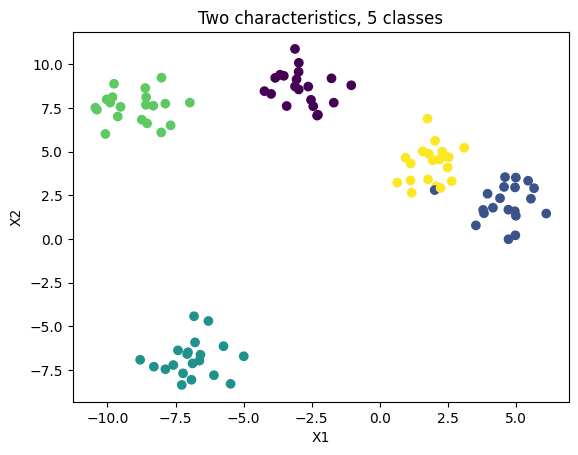

In [ ]:
from sklearn.datasets import make_blobs

#Generate Data
X_train, true_labels = make_blobs(n_samples=100, centers=5, random_state=42)

# Plot
plt.scatter( X_train[:,0], X_train[:,1], c=true_labels, cmap = 'viridis')

plt.xlabel("X1")
plt.ylabel("X2")
plt.title ('Two characteristics, 5 classes')
plt.show()

###  Choosing the value of K
https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb 

Common methods to determine the optimal K include:

1. Elbow method
    Calculate the Within-Cluster-Sum of Squared Errors (WCSS) for different 
    values of k, and choose the k for which WSS becomes first starts to 
    diminish.  In the plot of WSS-versus-k, this is visible as an elbow.

    How to use it:

    * Compute K-means clustering for a range of K values
    * Plot WCSS vs K
    * Identify the elbow point

2. Silhuete Score

    The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

The Elbow Method is more of a decision rule, while the Silhouette is a metric used for validation while clustering. Thus, it can be used in combination with the Elbow Method.

In [ ]:
def calculate_wcss(X, max_K):
    wcss = []
    for K in range(1, max_K+1):
        centroids, labels = k_means(X, K)
        # Compute WCSS
        intra_cluster_distances = np.linalg.norm(X - centroids[labels], axis=1)
        wcss.append(np.sum(intra_cluster_distances ** 2))
    return wcss
